# Genetic Algorithm (GA) for Protein Folding — HP Model
This notebook runs the GA-based folding method on a given HP sequence or FASTA sequence.
It will:
1. Load or define a sequence.
2. Convert to HP format (if FASTA).
3. Run the GA for the selected lattice type.
4. Output minimum energy, deviation, runtime.
5. Visualize the best fold.



## **Dataset Organization by Sequence Length**

The dataset is split into multiple tables based on the **number of amino acids** in the chain:

- **Small sequences**: Length ≤ 30  
- **Medium sequences**: 31–60  
- **Large sequences**: > 60  

Each entry includes:
- File name
- Protein ID
- Chain
- Protein name
- Organism
- Sequence length
- Amino acid sequence
- HP sequence (for GA folding)


The dataset contains protein sequences in **FASTA format** from the RCSB Protein Data Bank.

| File Name             | Protein ID | Chain | Protein Name | Organism                     | Sequence Length | Sequence                        |
|-----------------------|------------|-------|--------------|------------------------------|-----------------|---------------------------------|
| rcsb_pdb_1A7F.fasta   | 1A7F_1     | A     | Insulin      | Homo sapiens (9606)          | 21              | GIVEQCCTSICSLYQLENYCN           |
| rcsb_pdb_1A7F.fasta   | 1A7F_2     | B     | Insulin      | Homo sapiens (9606)          | 30              | FVNQHLCGSHLVEALELVCGERGGFYTPK   |
| rcsb_pdb_1APH.fasta   | 1APH_1     | A     | Insulin      | BOS TAURUS   (9913)          | 21              | GIVEQCCASVCSLYQLENYCN           |
| rcsb_pdb_1APH.fasta   | 1APH_2     | B     | Insulin      | BOS TAURUS   (9913)          | 30              | FVNQHLCGSHLVEALYLVCGERGFFYTPKA  |
| rcsb_pdb_1ANP.fasta   | 1ANP_1     | A     | ATRIAL NATRIURETIC PEPTIDE | Homo sapiens (9606) | 28         | SLDRSSCFTGSLDSIRAQSGLGCNSFRY    |
| rcsb_pdb_1B17.fasta   | 1B17_1     | A     | Insulin      | SUS SCROFA   (9823)          | 21              | GIVEQCCTSICSLYQLENYCN           |
| rcsb_pdb_1B17.fasta   | 1B17_2     | B     | Insulin      | SUS SCROFA   (9823)          | 30              | FVNQHLCGSHLVEALYLVCGERGFFYTPKA  |
| rcsb_pdb_1BZV.fasta   | 1BZV_1     | A     | Insulin      | null (9770)                  | 21              | GIVEQCCTSICSLYQLENYCN           |
| rcsb_pdb_1BZV.fasta   | 1BZV_2     | B     | Insulin      | synthetic construct (32630)  | 26              | FVNQHLCGSHLVEALYLVCGERGFFA      |
| rcsb_pdb_1CKW.fasta   | 1CKW_1     | A     | CFTR         | null                         | 26              | MPGTIKENIIGVSYDEYRYRSVIKA       | 
| rcsb_pdb_2BN3.fasta   | 2BN3_1     | A     | Insulin      | BOS TAURUS   (9913)          | 21              | GIVEQCCTSVCSLYQLENYCN           |
| rcsb_pdb_2BN3.fasta   | 2BN3_2     | B     | Insulin      | BOS TAURUS   (9913)          | 30              | FVNQHLCGSHLVEALYLVCGERGFFYTPKA  |

### 1- Chain A from rcsb_pdb_1A7F.fasta

In [ ]:
fasta_sequence = "GIVEQCCTSICSLYQLENYCN"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

HP Sequence: HHHPPPPPPHPPHPPHPPPPP
Length: 21


## Run the GA Method
We will run the GA for the chosen lattice type:
- **Square 2D**
- **Triangular 2D**
- **Cubic 3D**

Default parameters:
- Generations: 5000
- Population Size: 200 (Square/3D), 500 (Triangular)


In [2]:
from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")


Minimum Energy: -4
Runtime: 0.25 minutes


## Visualization of the Best Fold
The plot shows the fold path:
- **Red** = Hydrophobic residues (H)
- **Blue** = Polar residues (P)


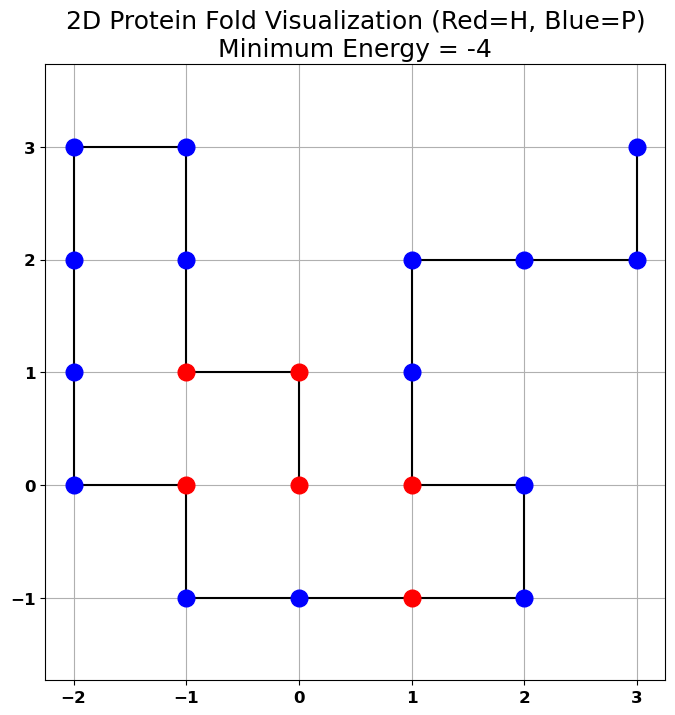

In [3]:
visualize_fold(hp_sequence, best_coords, min_energy)

### 1- Chain B from rcsb_pdb_1A7F.fasta

In [ ]:
fasta_sequence = "FVNQHLCGSHLVEALELVCGERGGFYTPK"  # Chain B
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

HP Sequence: HHPPPHPHPPHHPHHPHHPHPPHHHPPHP
Length: 29


In [5]:
from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")


Minimum Energy: -11
Runtime: 0.42 minutes


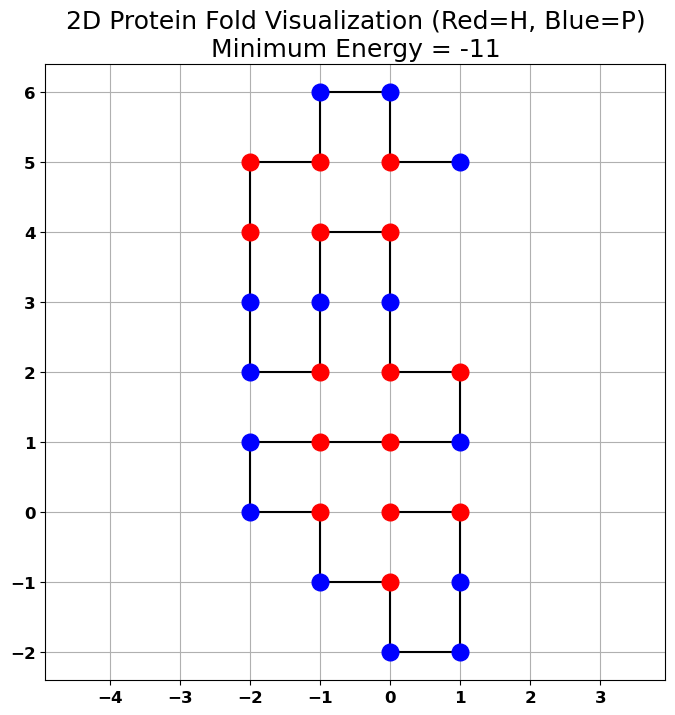

In [6]:
visualize_fold(hp_sequence, best_coords, min_energy)

### 2- Chain A from rcsb_pdb_1APH.fasta

HP Sequence: HHHPPPPHPHPPHPPHPPPPP
Length: 21
Minimum Energy: -6
Runtime: 0.27 minutes


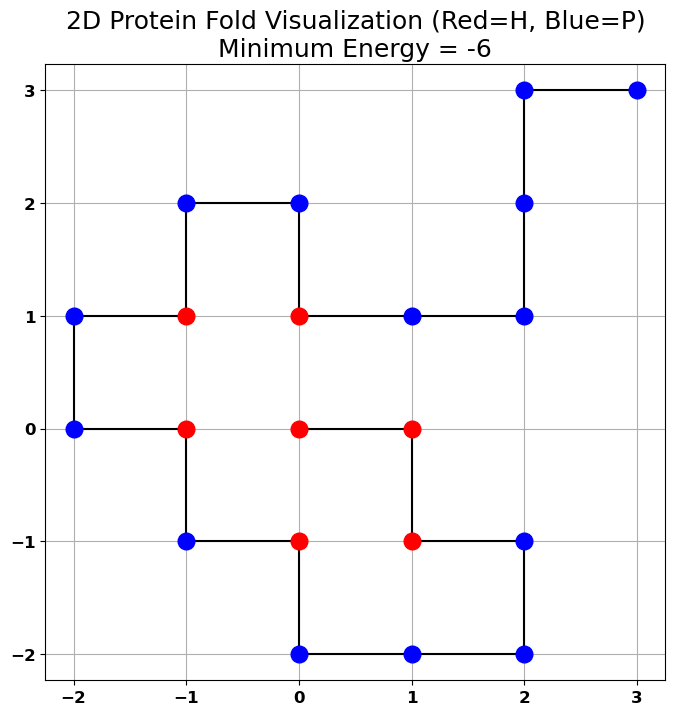

In [8]:
fasta_sequence = "GIVEQCCASVCSLYQLENYCN"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 2- Chain B from rcsb_pdb_1APH.fasta

HP Sequence: HHPPPHPHPPHHPHHPHHPHPPHHHPPHPH
Length: 30
Minimum Energy: -12
Runtime: 0.46 minutes


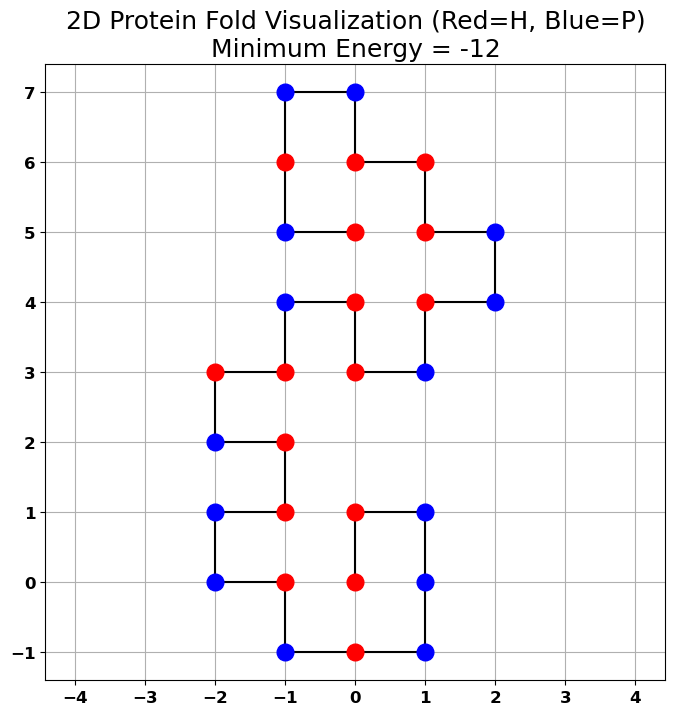

In [9]:
fasta_sequence = "FVNQHLCGSHLVEALYLVCGERGFFYTPKA"  # Chain B
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 3- Chain A from rcsb_pdb_1ANP.fasta

HP Sequence: PHPPPPPHPHPHPPHPHPPHHHPPPHPP
Length: 28
Minimum Energy: -6
Runtime: 1.05 minutes


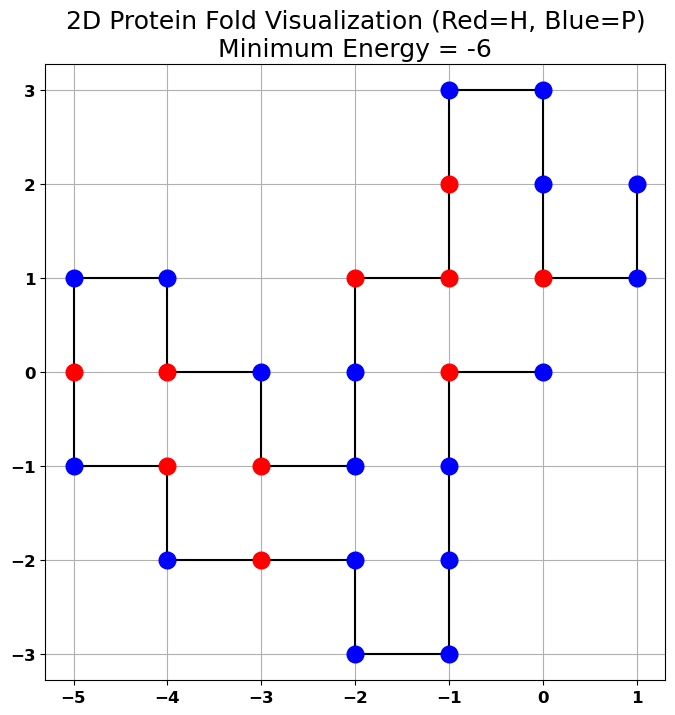

In [9]:
fasta_sequence = "SLDRSSCFTGSLDSIRAQSGLGCNSFRY"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 4- Chain A from rcsb_pdb_1AB17.fasta

HP Sequence: HHHPPPPPPHPPHPPHPPPPP
Length: 21
Minimum Energy: -4
Runtime: 0.26 minutes


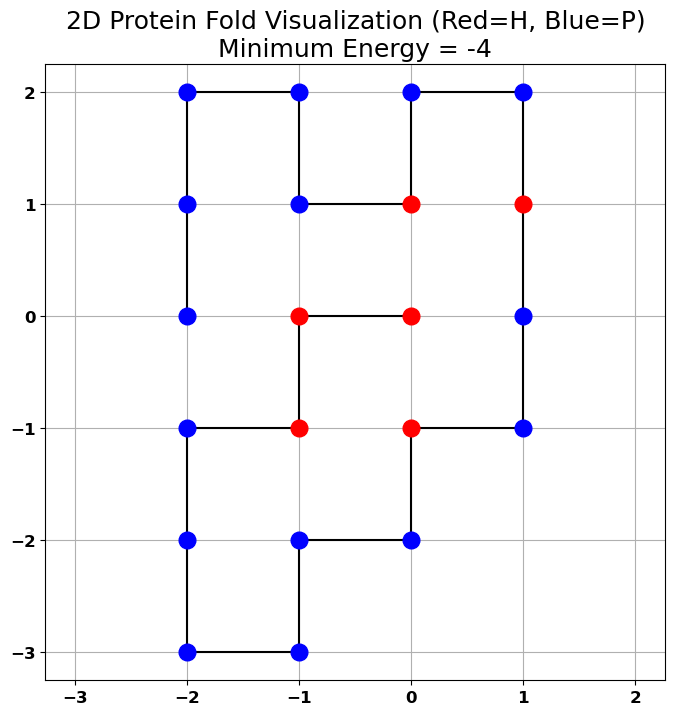

In [11]:
fasta_sequence = "GIVEQCCTSICSLYQLENYCN"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 4- Chain B from rcsb_pdb_1B17.fasta

HP Sequence: HHPPPHPHPPHHPHHPHHPHPPHHHPPHPH
Length: 30
Minimum Energy: -11
Runtime: 0.46 minutes


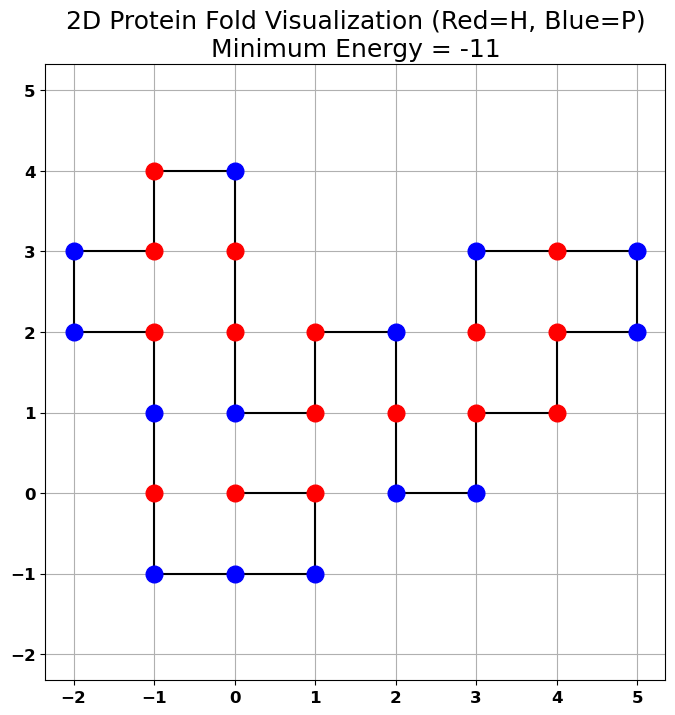

In [12]:
fasta_sequence = "FVNQHLCGSHLVEALYLVCGERGFFYTPKA"  # Chain B
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 5- Chain A from rcsb_pdb_1BZV.fasta

HP Sequence: HHHPPPPPPHPPHPPHPPPPP
Length: 21
Minimum Energy: -4
Runtime: 0.87 minutes


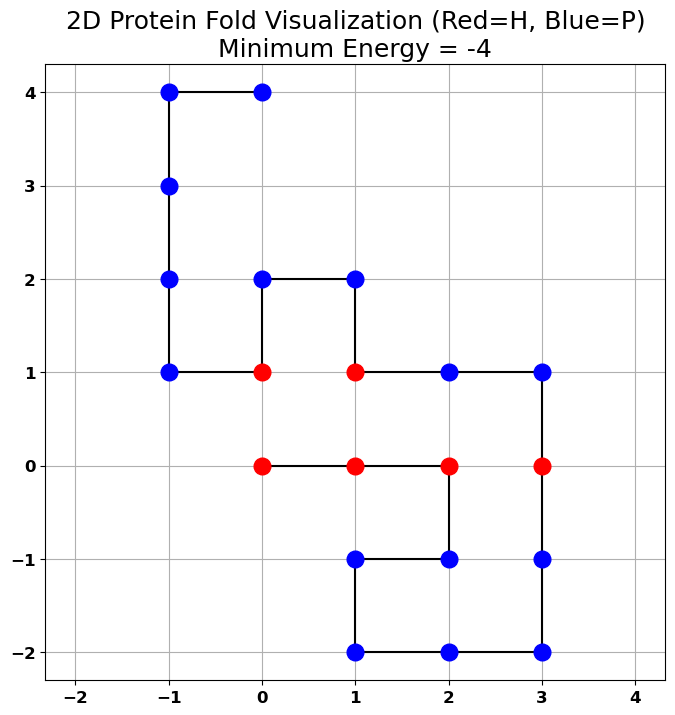

In [10]:
fasta_sequence = "GIVEQCCTSICSLYQLENYCN"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 5- Chain B from rcsb_pdb_1BZV.fasta

HP Sequence: HHPPPHPHPPHHPHHPHHPHPPHHHH
Length: 26
Minimum Energy: -12
Runtime: 1.21 minutes


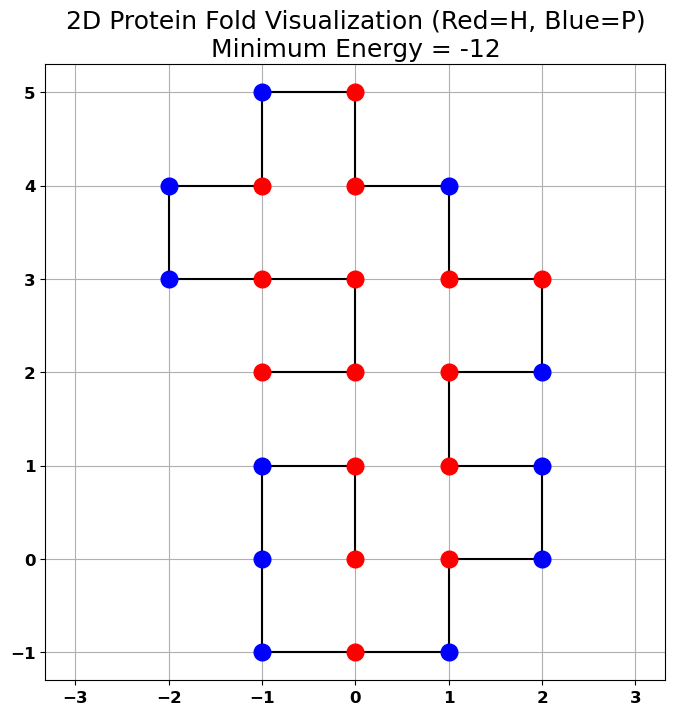

In [11]:
fasta_sequence = "FVNQHLCGSHLVEALYLVCGERGFFA"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 6- Chain A from rcsb_pdb_1CKW.fasta

HP Sequence: HHHPHPPPHHHHPPPPPPPPPHHPH
Length: 25
Minimum Energy: -7
Runtime: 1.08 minutes


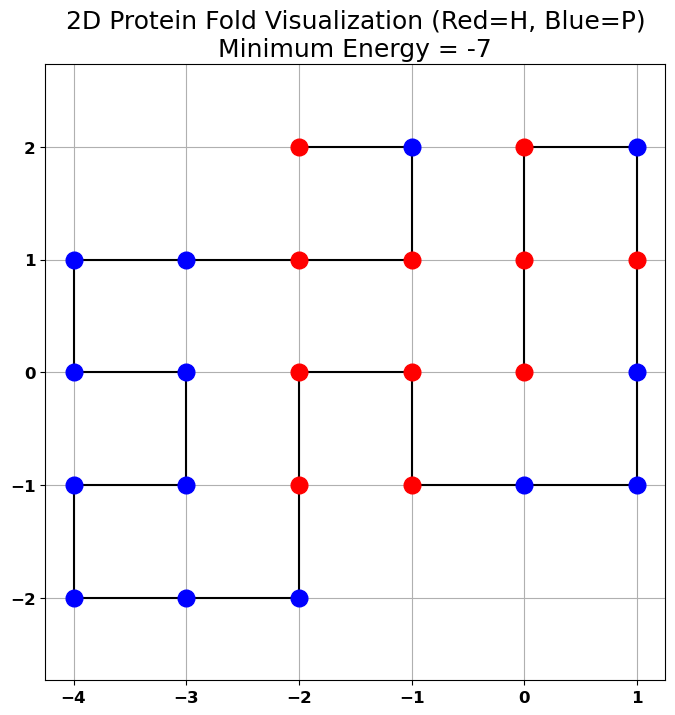

In [12]:
fasta_sequence = "MPGTIKENIIGVSYDEYRYRSVIKA"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 7- Chain A from rcsb_pdb_2BN3.fasta

HP Sequence: HHHPPPPPPHPPHPPHPPPPP
Length: 21
Minimum Energy: -4
Runtime: 1.14 minutes


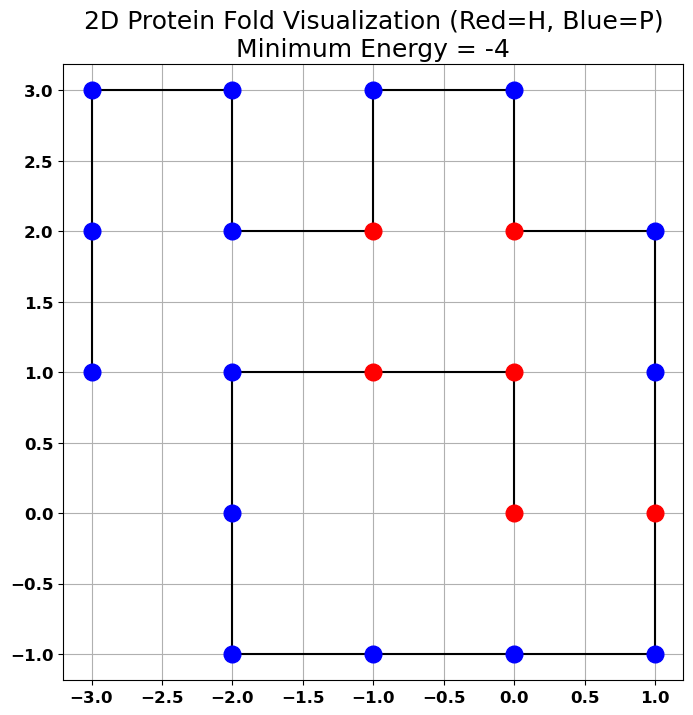

In [4]:
fasta_sequence = "GIVEQCCTSVCSLYQLENYCN"  # Chain A
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### 7- Chain B from rcsb_pdb_2BN3.fasta

HP Sequence: HHPPPHPHPPHHPHHPHHPHPPHHHPPHPH
Length: 30
Minimum Energy: -13
Runtime: 1.20 minutes


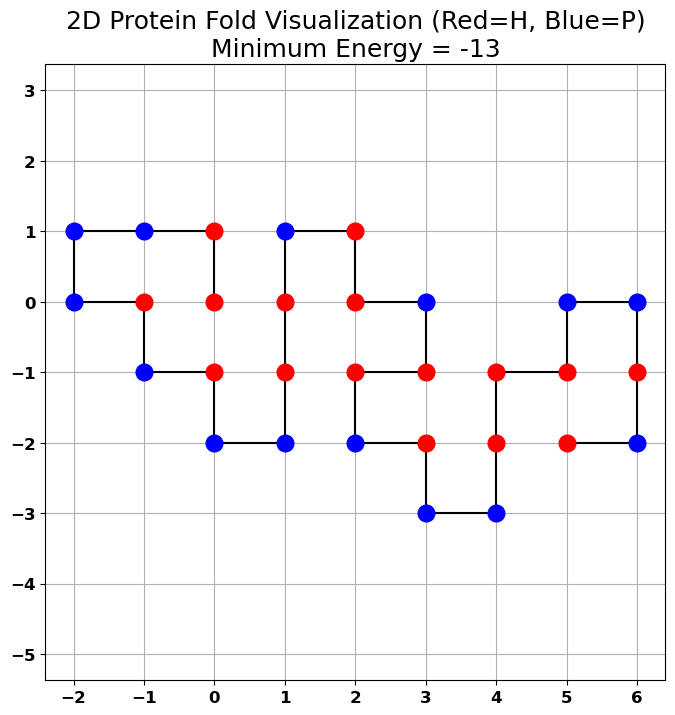

In [5]:
fasta_sequence = "FVNQHLCGSHLVEALYLVCGERGFFYTPKA"  # Chain B
from genatic_algorithm_method import fasta_to_hp

# Convert FASTA to HP
hp_sequence = fasta_to_hp(fasta_sequence)
print("HP Sequence:", hp_sequence)
print("Length:", len(hp_sequence))

from genatic_algorithm_method import (
    square_genetic_algorithm,
    trianguler_genetic_algorithm,
    genetic_algorithm_3d,
    visualize_fold
)
import time

# Choose lattice type: "square", "triangular", "cubic"
lattice_type = "square"  

start_time = time.time()

if lattice_type == "square":
    min_energy, best_coords = square_genetic_algorithm(hp_sequence, generations=5000, pop_size=200)
elif lattice_type == "triangular":
    min_energy, best_coords = trianguler_genetic_algorithm(hp_sequence, generations=5000, pop_size=500)
elif lattice_type == "cubic":
    min_energy, best_coords = genetic_algorithm_3d(hp_sequence, generations=5000, pop_size=200)
else:
    raise ValueError("Invalid lattice type selected.")

end_time = time.time()

print(f"Minimum Energy: {min_energy}")
print(f"Runtime: {(end_time - start_time)/60:.2f} minutes")

visualize_fold(hp_sequence, best_coords, min_energy)

### - **Medium Sequences Table** (26–60 AA)

| File Name             | Protein ID | Chain | Protein Name | Organism                     | Sequence Length | Sequence                        |
|-----------------------|------------|-------|--------------|------------------------------|-----------------|---------------------------------|